<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/poseEstimation/tests/mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [45]:
!pip install mediapipe
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt


We'll connect the Nextcloud server and grab an image from it

In [3]:
# we'll link the dataset from next-cloud
!apt install -y davfs2  > /dev/null

nextcloud = "/content/nextcloud"
Nextcloud_URL = "https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/" #@param {type:"string"}

os.makedirs(nextcloud, exist_ok=True)


if os.path.isfile("/etc/fstab"):
  os.remove("/etc/fstab")
with open("/etc/fstab" , "a") as f:
  f.write(Nextcloud_URL + " " + nextcloud + " davfs user,rw,auto 0 0")
!mount {nextcloud}

# open existing text file
txt = "/etc/fstab"
viewTxt = open(txt, "r")
txtContent = viewTxt.read()
print("txtContent: {}".format(txtContent))



Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: colab
Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
/sbin/mount.davfs: warning: the server does not support locks
txtContent: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/nextcloud davfs user,rw,auto 0 0


## Define input/output folders

In [6]:
# clean and rebuild the image folders
input_folder = '/content/nextcloud/bgRemovalInference'

output_folder = '/content/output'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
os.makedirs(output_folder)

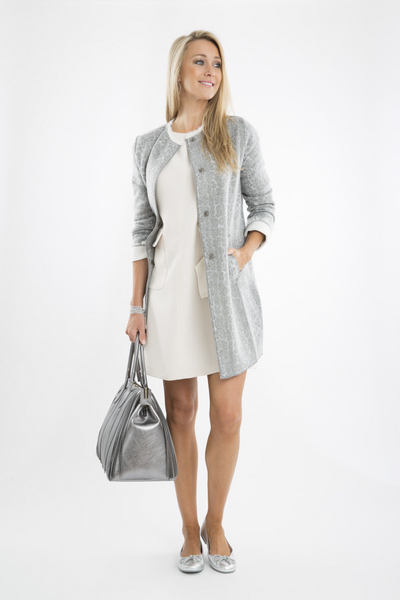

Image Dimensions : (600, 400, 3)


In [60]:
from google.colab.patches import cv2_imshow
from pathlib import Path
#grab a random sample from training set
def pick_random_sample(dir):
  img_path = Path(input_folder) / random.choice(os.listdir(input_folder))
  input_image = cv2.imread(str(img_path),1) 
  return input_image
img = pick_random_sample(input_folder)
cv2_imshow(img)
print('Image Dimensions :', img.shape)

In [59]:
# load all testing samples
images = {name: cv2.imread(str(Path(input_folder) / name),1) for name in os.listdir(input_folder)}

part01-AI-000001.jpg


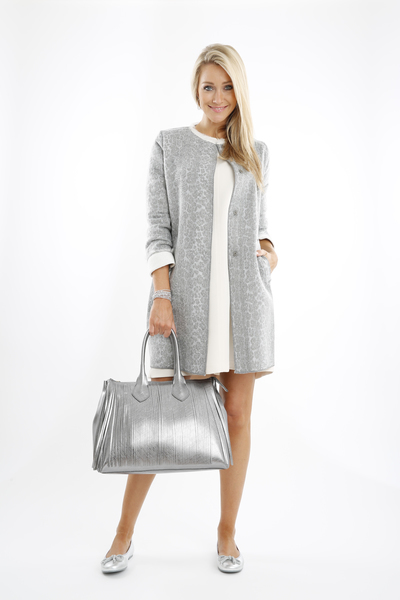

part01-AI-000002.jpg


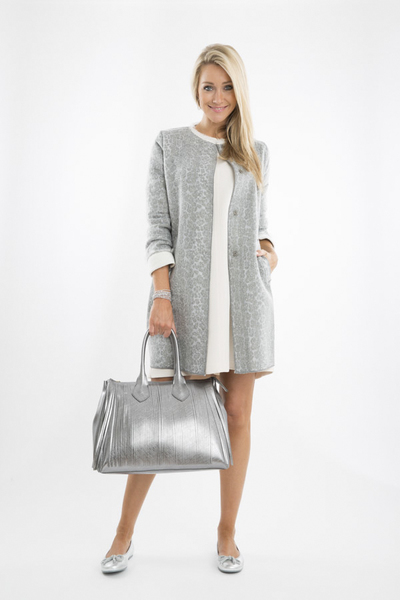

part01-AI-000003.jpg


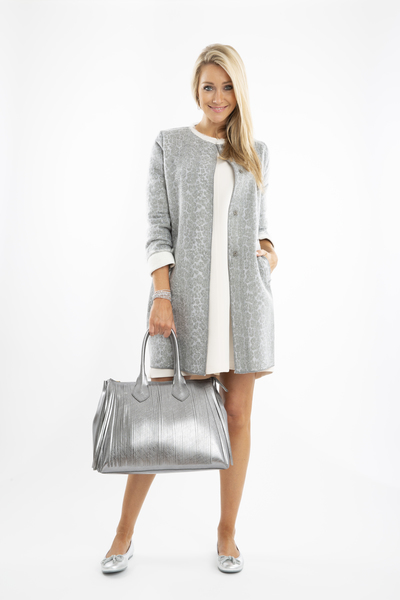

part01-AI-000004.jpg


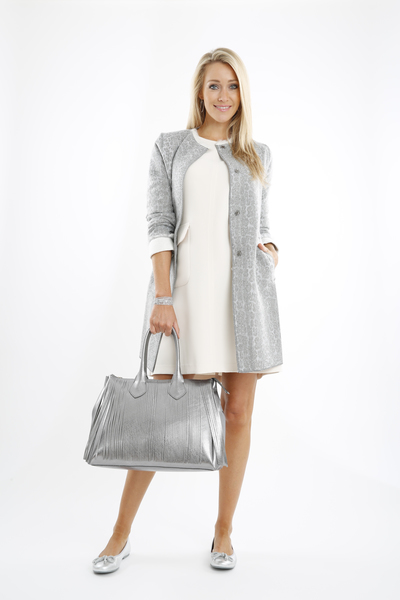

part01-AI-000005.jpg


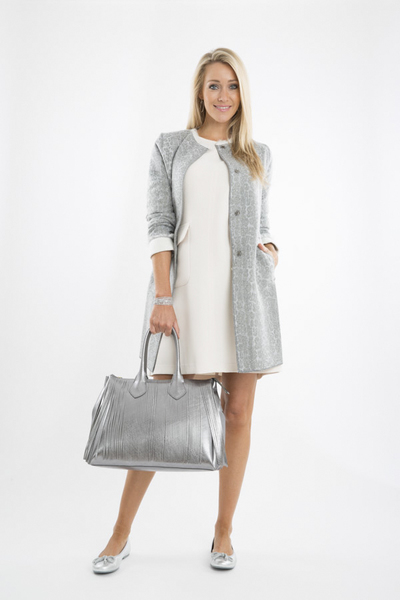

part01-AI-000006.jpg


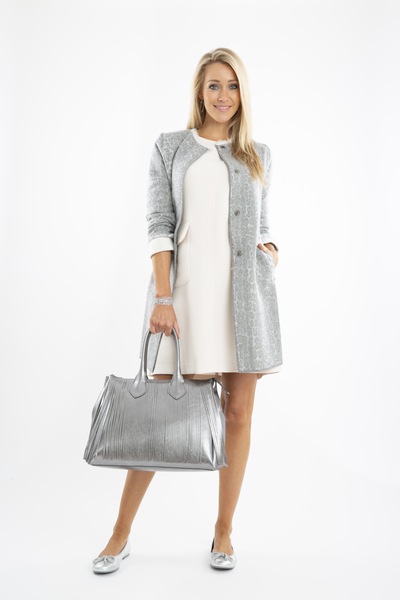

part01-AI-000007.jpg


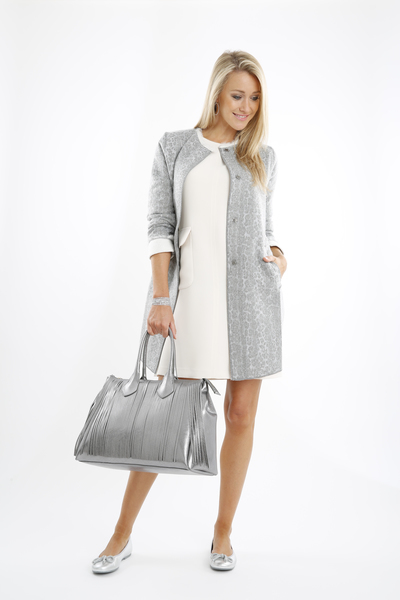

part01-AI-000008.jpg


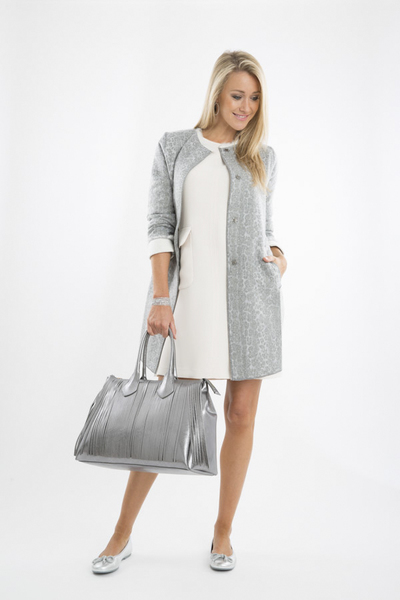

part01-AI-000009.jpg


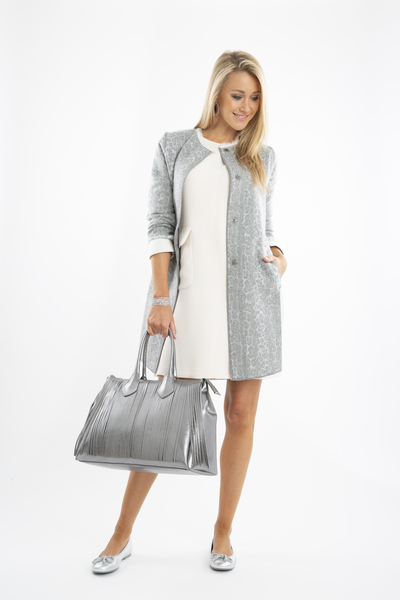

part01-AI-000010.jpg


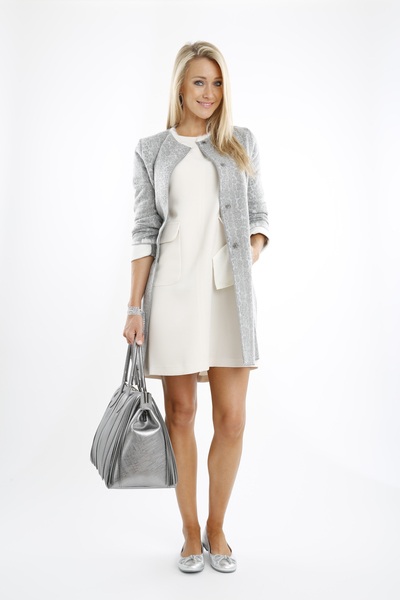

part01-AI-000011.jpg


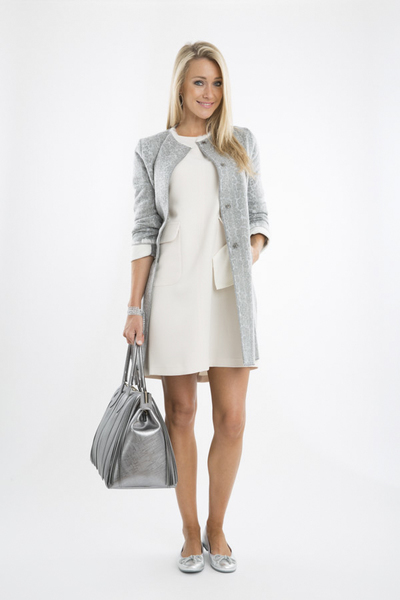

part01-AI-000012.jpg


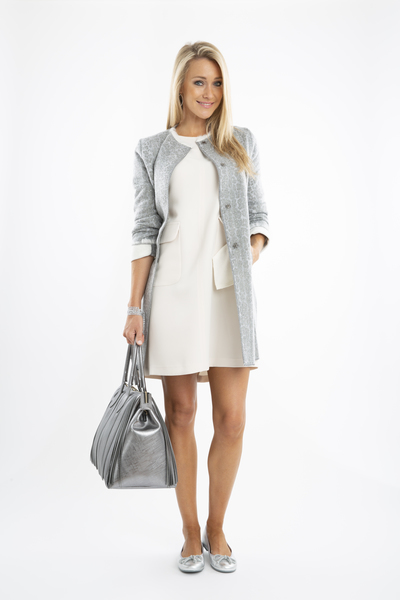

part01-AI-000013.jpg


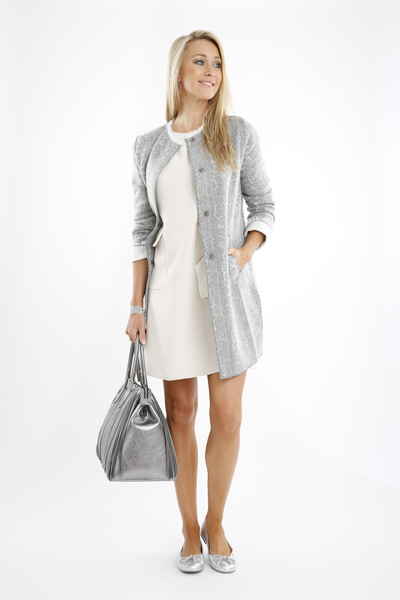

part01-AI-000014.jpg


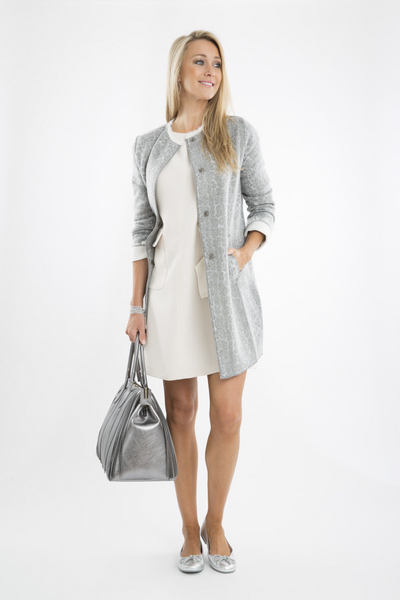

part01-AI-000015.jpg


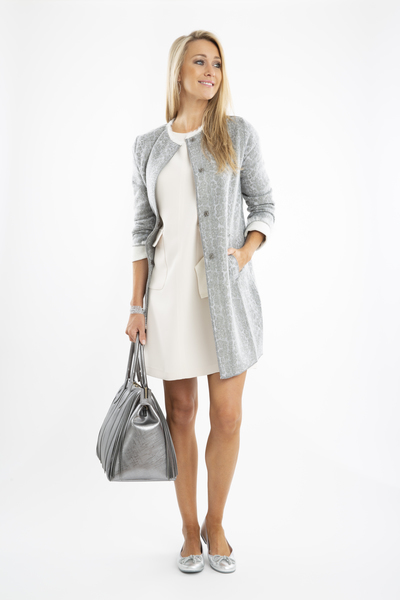

In [39]:
for key, value in images.items():
  print(key)
  cv2_imshow(value)

david-hofmann-e_rhazQLaSs-unsplash.jpg


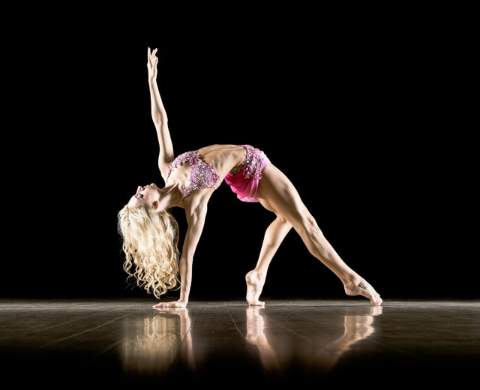

thao-le-hoang-v4zceVZ5HK8-unsplash.jpg


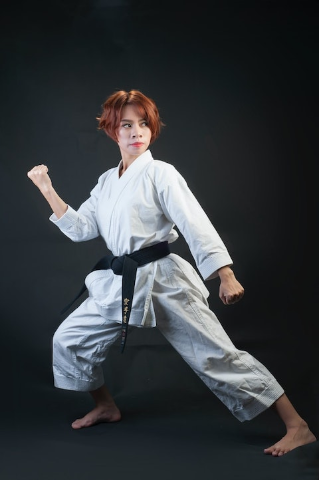

In [ ]:
# DESIRED_HEIGHT = 480
# DESIRED_WIDTH = 480
# def resize_and_show(image):
#   h, w = image.shape[:2]
#   if h < w:
#     img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
#   else:
#     img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
#   cv2_imshow(img)

# # Read images with OpenCV.
# images = {name: cv2.imread(name) for name in uploaded.keys()}
# # Preview the images.
# for name, image in images.items():
#   print(name)   
#   resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [19]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [64]:
# Run MediaPipe Pose and draw pose landmarks.
def pose_landmarks(img_dict):
  with mp_pose.Pose(
      static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    result_list = list()
    for name, image in img_dict.items():
      # Convert the BGR image to RGB and process it with MediaPipe Pose.
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
      # Print nose landmark.
      image_hight, image_width, _ = image.shape
      if not results.pose_landmarks:
        continue
      # print(
      #   f'Nose coordinates: ('
      #   f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      #   f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
      # )

      # Draw pose landmarks.
      # print(f'Pose landmarks of {name}:')
      annotated_image = image.copy()
      mp_drawing.draw_landmarks(
          annotated_image,
          results.pose_landmarks,
          mp_pose.POSE_CONNECTIONS,
          landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
      # resize_and_show(annotated_image)
      # cv2_imshow(annotated_image)
      result_list.append(annotated_image)
    return result_list
image_list = pose_landmarks(images)

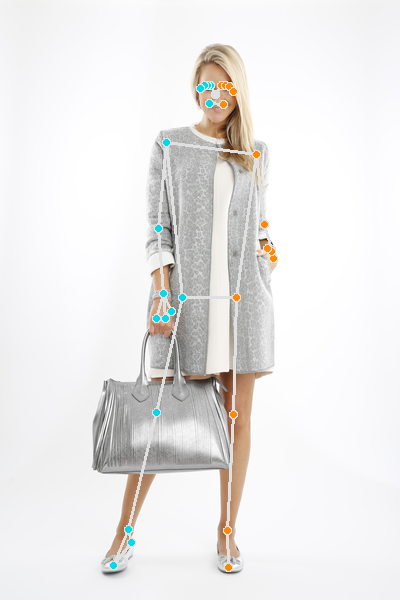

In [65]:
cv2_imshow(image_list[0])

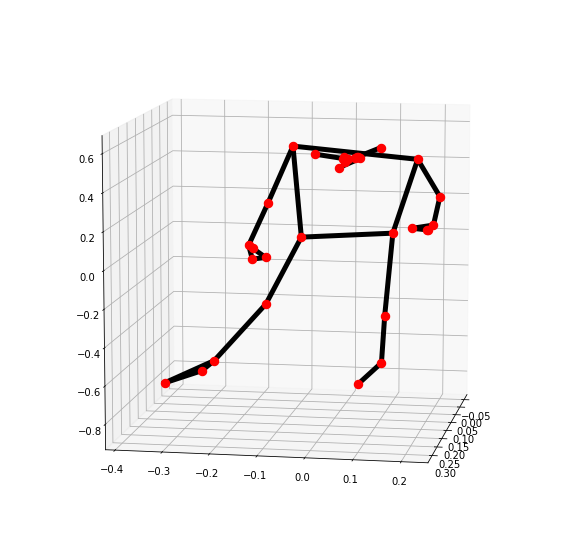

In [99]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
def plot_3d_landmarks(img_dict):
  with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    result_list=list()
    for name, image in img_dict.items():
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
plot_3d_landmarks({'test':pick_random_sample(input_folder)})

part01-AI-000001.jpg [[[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [244 242 242]
  [244 242 242]
  [244 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [244 242 242]
  [244 242 242]
  [244 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [244 242 242]
  [244 242 242]
  [244 242 242]]

 ...

 [[239 240 238]
  [239 240 238]
  [241 239 238]
  ...
  [243 241 241]
  [242 240 240]
  [242 240 240]]

 [[239 239 239]
  [241 239 239]
  [241 239 238]
  ...
  [243 241 241]
  [242 240 240]
  [242 240 240]]

 [[241 239 239]
  [241 239 239]
  [241 239 238]
  ...
  [243 241 241]
  [242 240 240]
  [242 240 240]]]
Pose segmentation of part01-AI-000001.jpg:


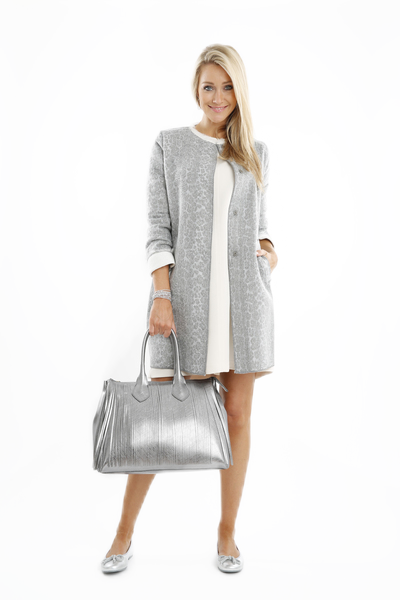

part01-AI-000002.jpg [[[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [235 235 235]
  [236 236 236]
  [235 235 235]]

 [[236 236 236]
  [235 235 235]
  [235 235 235]
  ...
  [236 236 236]
  [236 236 236]
  [235 235 235]]

 [[234 234 234]
  [236 236 236]
  [235 235 235]
  ...
  [236 236 236]
  [236 236 236]
  [235 235 235]]

 ...

 [[233 233 233]
  [233 233 233]
  [233 233 233]
  ...
  [234 234 234]
  [235 235 235]
  [234 234 234]]

 [[232 232 232]
  [232 232 232]
  [233 233 233]
  ...
  [234 234 234]
  [234 234 234]
  [234 234 234]]

 [[232 232 232]
  [233 233 233]
  [233 233 233]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]]
Pose segmentation of part01-AI-000002.jpg:


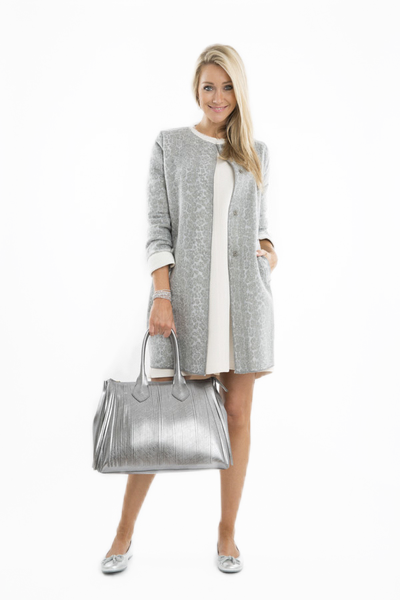

part01-AI-000003.jpg [[[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 ...

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]

 [[239 239 239]
  [239 239 239]
  [239 239 239]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]

 [[239 239 239]
  [239 239 239]
  [240 240 240]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]]
Pose segmentation of part01-AI-000003.jpg:


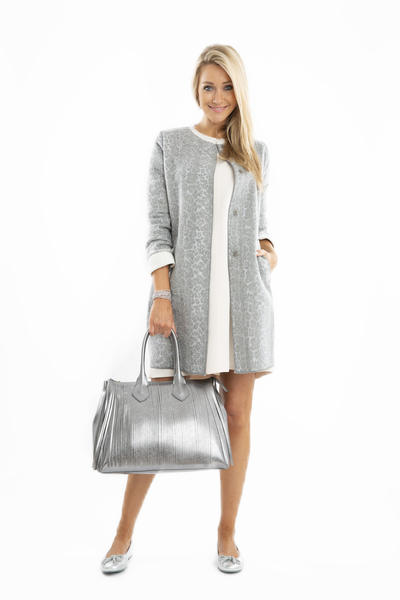

part01-AI-000004.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 240]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 241]]

 ...

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 240]]

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 240]
  [242 240 239]
  [242 240 239]]

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]]
Pose segmentation of part01-AI-000004.jpg:


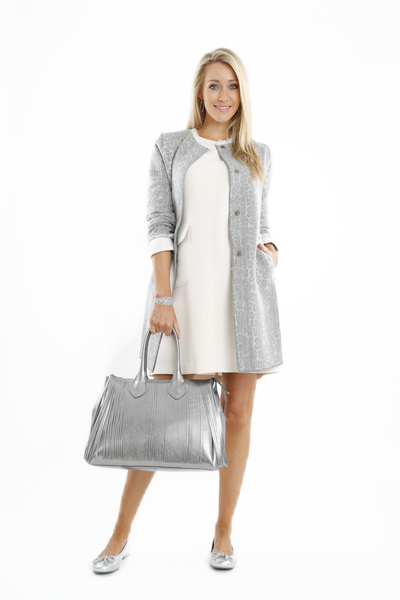

part01-AI-000005.jpg [[[235 235 235]
  [235 235 235]
  [235 235 235]
  ...
  [235 235 235]
  [233 233 233]
  [234 234 234]]

 [[234 234 234]
  [234 234 234]
  [234 234 234]
  ...
  [234 234 234]
  [234 234 234]
  [233 233 233]]

 [[234 234 234]
  [234 234 234]
  [234 234 234]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]

 ...

 [[233 234 232]
  [232 233 231]
  [232 233 231]
  ...
  [236 234 234]
  [236 234 234]
  [235 233 233]]

 [[231 232 230]
  [231 232 230]
  [232 233 231]
  ...
  [235 233 233]
  [236 234 234]
  [235 233 233]]

 [[232 233 231]
  [232 233 231]
  [232 233 231]
  ...
  [236 234 234]
  [236 234 234]
  [236 234 234]]]
Pose segmentation of part01-AI-000005.jpg:


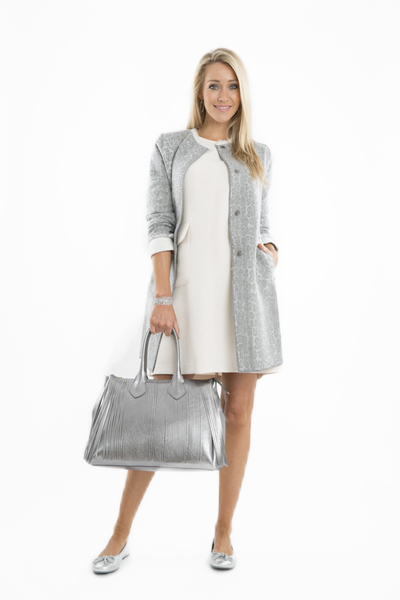

part01-AI-000006.jpg [[[242 242 242]
  [242 242 242]
  [241 241 241]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 ...

 [[239 239 239]
  [239 239 239]
  [241 239 238]
  ...
  [242 240 239]
  [243 241 240]
  [242 240 239]]

 [[239 239 239]
  [239 239 239]
  [241 239 238]
  ...
  [243 241 240]
  [242 240 240]
  [242 240 240]]

 [[239 239 239]
  [239 239 239]
  [239 240 238]
  ...
  [243 241 240]
  [242 240 240]
  [242 239 241]]]
Pose segmentation of part01-AI-000006.jpg:


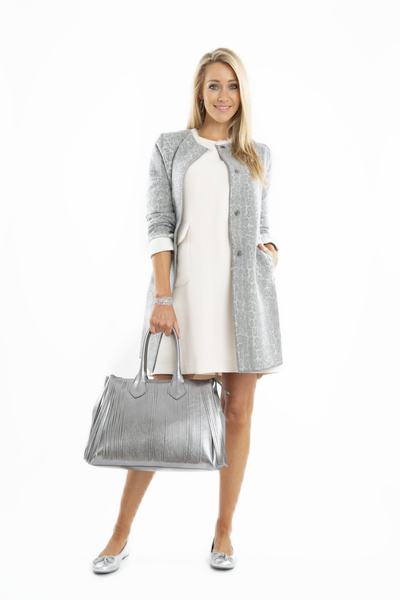

part01-AI-000007.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 240]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 241]]

 ...

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 240]
  [242 240 239]
  [242 240 239]]]
Pose segmentation of part01-AI-000007.jpg:


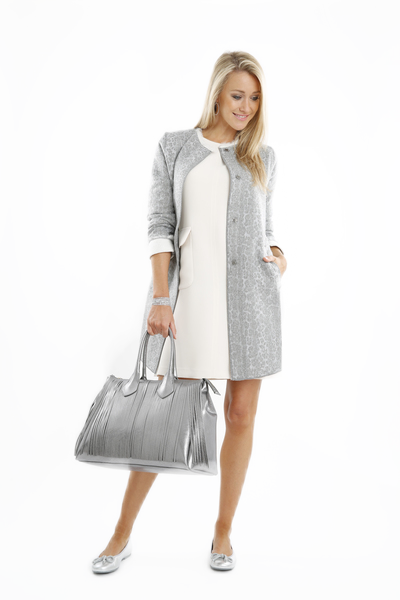

part01-AI-000008.jpg [[[234 234 234]
  [235 235 235]
  [235 235 235]
  ...
  [235 235 235]
  [233 233 233]
  [234 234 234]]

 [[234 234 234]
  [234 234 234]
  [234 234 234]
  ...
  [234 234 234]
  [234 234 234]
  [233 233 233]]

 [[234 234 234]
  [235 235 235]
  [234 234 234]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]

 ...

 [[232 233 231]
  [232 233 231]
  [232 233 231]
  ...
  [234 234 234]
  [234 234 234]
  [235 233 233]]

 [[232 233 231]
  [232 233 231]
  [232 233 231]
  ...
  [234 234 234]
  [234 234 234]
  [232 232 232]]

 [[232 233 231]
  [232 233 231]
  [232 233 231]
  ...
  [234 234 234]
  [234 234 234]
  [233 233 233]]]
Pose segmentation of part01-AI-000008.jpg:


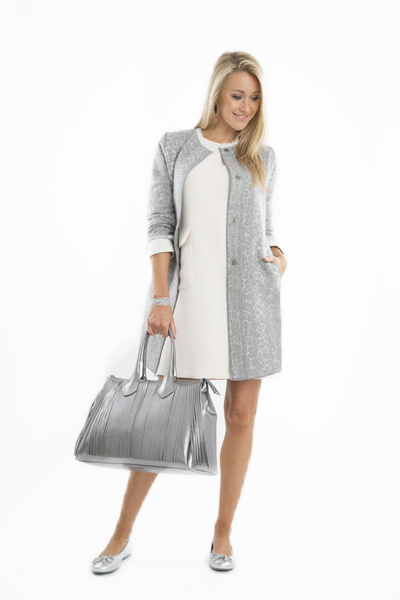

part01-AI-000009.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 ...

 [[241 239 238]
  [241 239 238]
  [241 239 238]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]

 [[239 240 238]
  [241 239 238]
  [241 239 238]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]

 [[239 240 238]
  [241 239 238]
  [241 239 238]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]]
Pose segmentation of part01-AI-000009.jpg:


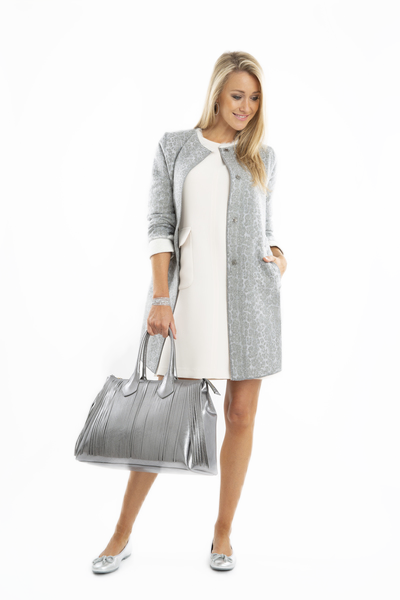

part01-AI-000010.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 240]
  [243 241 240]
  [243 242 238]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 240]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 241]]

 ...

 [[239 237 236]
  [239 237 236]
  [239 237 236]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]

 [[239 237 236]
  [239 237 236]
  [239 237 236]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 240]]

 [[239 237 236]
  [239 237 236]
  [239 237 236]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 240]]]
Pose segmentation of part01-AI-000010.jpg:


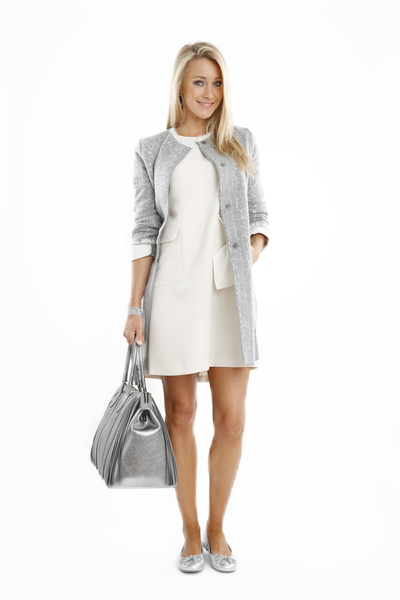

part01-AI-000011.jpg [[[234 234 234]
  [235 235 235]
  [235 235 235]
  ...
  [236 234 234]
  [237 235 235]
  [237 235 235]]

 [[234 234 234]
  [235 235 235]
  [235 235 235]
  ...
  [237 235 235]
  [237 235 235]
  [236 234 234]]

 [[234 234 234]
  [235 235 235]
  [234 234 234]
  ...
  [238 236 236]
  [237 235 235]
  [236 234 234]]

 ...

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [236 234 234]
  [236 234 234]
  [235 233 233]]

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [236 234 233]
  [235 233 232]
  [234 232 231]]

 [[233 231 230]
  [234 232 231]
  [233 231 230]
  ...
  [236 234 233]
  [236 234 233]
  [235 233 232]]]
Pose segmentation of part01-AI-000011.jpg:


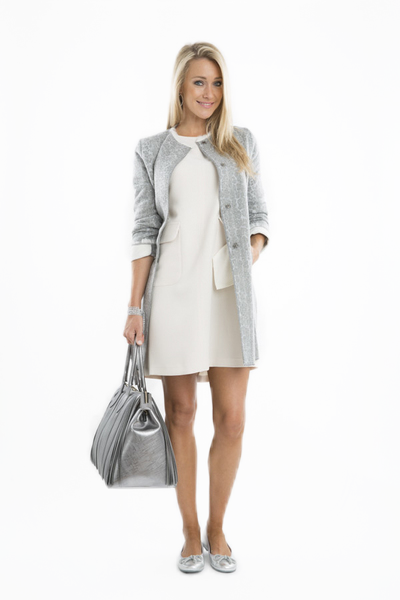

part01-AI-000012.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [244 242 242]
  [243 241 240]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 240]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [244 242 242]
  [244 242 242]]

 ...

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]

 [[240 238 237]
  [240 238 237]
  [240 238 237]
  ...
  [242 240 239]
  [242 240 239]
  [242 240 239]]]
Pose segmentation of part01-AI-000012.jpg:


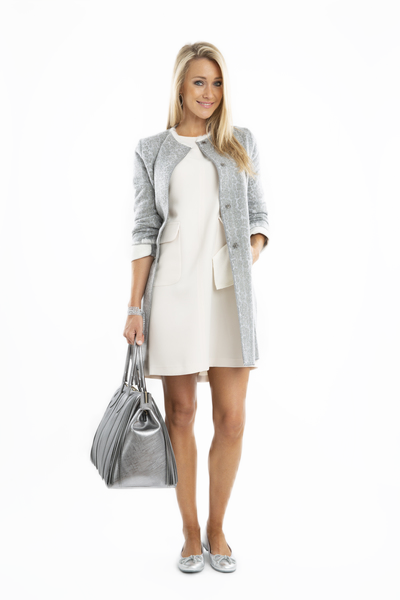

part01-AI-000013.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [241 241 241]
  [243 241 241]
  [243 241 241]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [241 241 241]
  [243 241 241]
  [243 241 241]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [243 241 241]
  [243 241 241]
  [243 241 241]]

 ...

 [[239 237 236]
  [239 237 236]
  [239 237 236]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]

 [[239 237 236]
  [239 237 236]
  [237 238 236]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]

 [[239 237 236]
  [237 238 236]
  [237 238 236]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]]
Pose segmentation of part01-AI-000013.jpg:


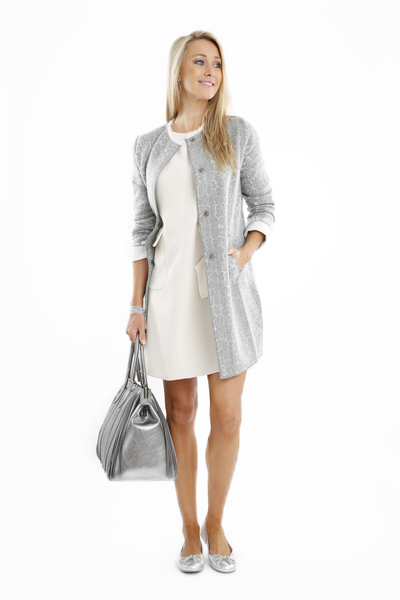

part01-AI-000014.jpg [[[234 234 234]
  [234 234 234]
  [234 234 234]
  ...
  [234 234 234]
  [234 234 234]
  [233 233 233]]

 [[234 234 234]
  [236 236 236]
  [235 235 235]
  ...
  [234 234 234]
  [234 234 234]
  [234 234 234]]

 [[235 235 235]
  [235 235 235]
  [234 234 234]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]

 ...

 [[232 233 231]
  [232 232 232]
  [232 232 232]
  ...
  [234 234 234]
  [234 234 234]
  [235 233 233]]

 [[231 231 231]
  [231 231 231]
  [232 232 232]
  ...
  [236 234 234]
  [235 233 233]
  [234 232 232]]

 [[231 231 231]
  [231 231 231]
  [232 232 232]
  ...
  [236 234 234]
  [235 233 233]
  [235 233 233]]]
Pose segmentation of part01-AI-000014.jpg:


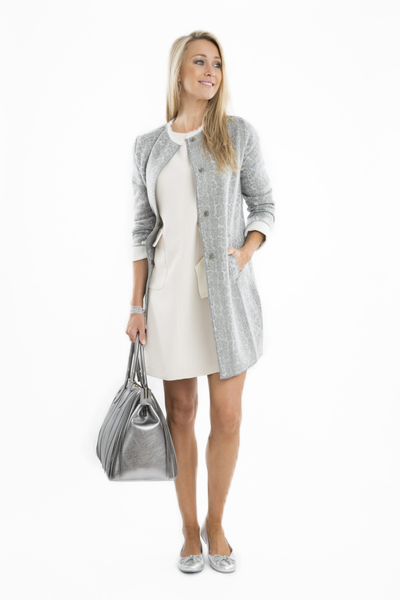

part01-AI-000015.jpg [[[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]

 ...

 [[238 239 237]
  [238 239 237]
  [238 239 237]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]

 [[238 239 237]
  [238 239 237]
  [238 239 237]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]

 [[238 239 237]
  [238 239 237]
  [238 239 237]
  ...
  [242 240 240]
  [242 240 240]
  [242 240 240]]]
Pose segmentation of part01-AI-000015.jpg:


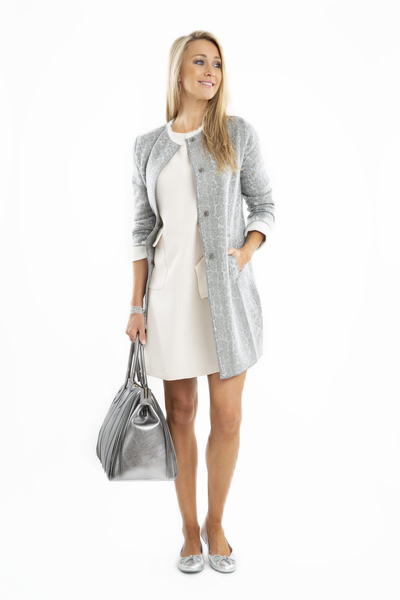

In [53]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    # resize_and_show(annotated_image)
    cv2_imshow(annotated_image)

In [54]:
def combine(img):
  with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
    for name, image in img.items():
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR))
    
    # # Draw pose segmentation.
    # fig, ax = plt.subplots(1,3)

    # print(f'Pose segmentation of {name}:')
    # segm_image = image.copy()
    # red_img = np.zeros_like(segm_image, dtype=np.uint8)
    # red_img[:, :] = (255,255,255)
    # segm_2class = 0.2 + 0.8 * results.segmentation_mask
    # segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    # segm_image = segm_image * segm_2class + red_img * (1 - segm_2class)

    # bone_struct = mp_drawing.plot_landmarks(
    #     results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # pose_img = image.copy()
    # mp_drawing.draw_landmarks(
    #     pose_img,
    #     results.pose_landmarks,
    #     mp_pose.POSE_CONNECTIONS,
    #     landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # ax[0,0].cv2_imshow(segm_image)

In [61]:
rand_img = pick_random_sample(input_folder)
# cv2_imshow(rand_img)
# combine({'test':rand_img})
img = {'test':rand_img}
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
    for name, image in img.items():
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR))

error: ignored